In [1]:
from datasets import load_dataset

In [2]:
ds = load_dataset("frgfm/imagenette", "160px")
# ds = load_dataset("frgfm/imagenette", "320px")
# ds = load_dataset("frgfm/imagenette", "full_size")

In [3]:
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 9469
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 3925
    })
})

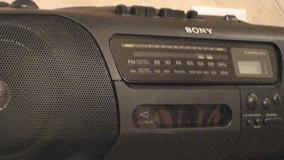

In [4]:
# show the first image
ds['train']['image'][0]

In [5]:
from sophon.classification.utils import save_bn, load_bn, check_gradients, accuracy, get_pretrained_model, test_original, test, initialize00, set_seed, save_data, get_finetuned_model

In [7]:
import sophon.classification.model as sophon_classif_models

In [9]:
vgg_19_pretrained = sophon_classif_models.vgg19(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg13-c768596a.pth" to /a/home/cc/students/cs/nirendy/.cache/torch/hub/checkpoints/vgg13-c768596a.pth
100%|█████████████████████████████████████████████████████████| 508M/508M [00:07<00:00, 68.4MB/s]


In [47]:
resnet18_pretrained = sophon_classif_models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /a/home/cc/students/cs/nirendy/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth
100%|███████████████████████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 47.5MB/s]


In [52]:
# model = vgg_19_pretrained
model = resnet18_pretrained

In [53]:
import torch

# BEGIN: Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# END: Define device

# Move the model to the device
model.to(device);

In [54]:
image = ds['train']['image'][0]

In [55]:
from torchvision import transforms

# Define the transformation to be applied to the images
transform = transforms.Compose([
    # transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

image_tensor = transform(image).unsqueeze(0).to(device)


In [56]:
image_tensor.shape

torch.Size([1, 3, 160, 284])

In [59]:
# Run the model on the image
model.eval()
with torch.no_grad():
    output = model(image_tensor)

In [60]:
output.shape

torch.Size([1, 1000])

In [61]:
# Get the predicted class
predicted_class = torch.argmax(output).item()

In [62]:
predicted_class

482

In [64]:
# expected output
ds['train']['label'][0]

2